In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

LotArea        int64
GrLivArea      int64
TotalBsmtSF    int64
GarageArea     int64
SalePrice      int64
dtype: object
         LotArea  GrLivArea  TotalBsmtSF  GarageArea  SalePrice
count    1460.00    1460.00      1460.00     1460.00     1460.0
mean    10516.83    1515.46      1057.43      472.98   180921.2
std      9981.26     525.48       438.71      213.80    79442.5
min      1300.00     334.00         0.00        0.00    34900.0
25%      7553.50    1129.50       795.75      334.50   129975.0
50%      9478.50    1464.00       991.50      480.00   163000.0
75%     11601.50    1776.75      1298.25      576.00   214000.0
max    215245.00    5642.00      6110.00     1418.00   755000.0


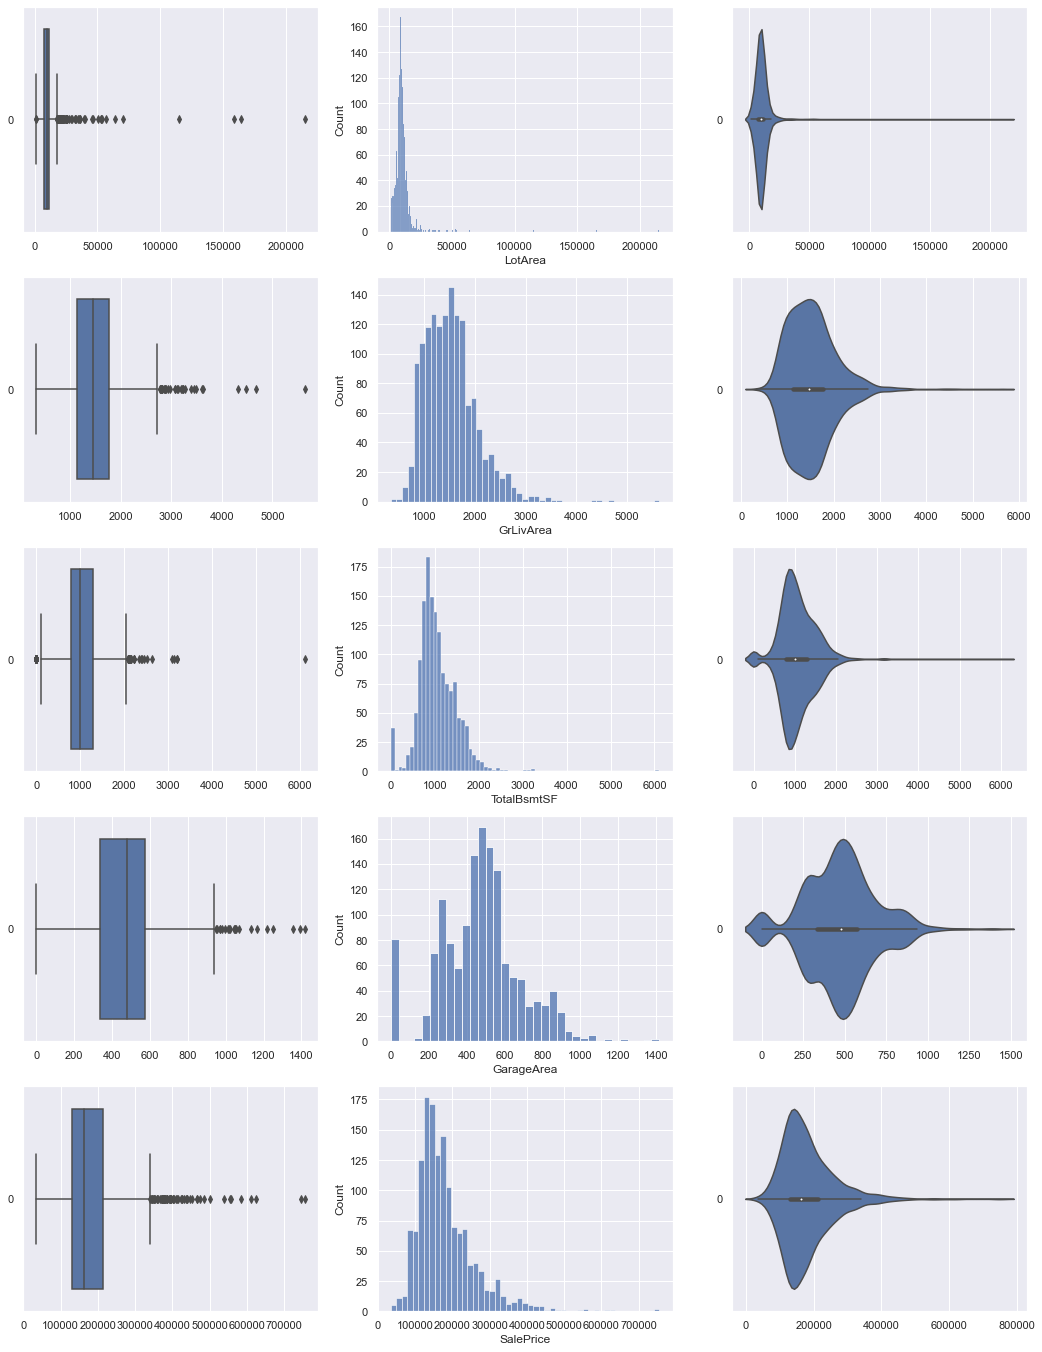

In [2]:
#a) Check the individual statistical description and visualize the statistical distributions of each of these variables.

houseData = pd.read_csv('train.csv')
houseNumData = pd.DataFrame(houseData[['LotArea', 'GrLivArea', 'TotalBsmtSF', 'GarageArea', 'SalePrice']])
print(houseNumData.dtypes)
print(houseNumData.describe().round(2))

# Draw the distributions of all variables
f, axes = plt.subplots(5, 3, figsize=(18, 24))

count = 0
for var in houseNumData:
    sb.boxplot(data = houseNumData[var], orient = "h", ax = axes[count,0])
    sb.histplot(data = houseNumData[var], ax = axes[count,1])
    sb.violinplot(data = houseNumData[var], orient = "h", ax = axes[count,2])
    count += 1

In [3]:
#b) Comment if the distributions look like “Normal Distribution”, or different. Use the .skew() method to find the
#“skewness” of each of the five distributions. Which of the variables has the maximum number of outliers?
print(houseNumData['LotArea'].skew())
print(houseNumData['GrLivArea'].skew())
print(houseNumData['TotalBsmtSF'].skew())
print(houseNumData['GarageArea'].skew())
print(houseNumData['SalePrice'].skew())
#Lot area has the most outliers

12.207687851233496
1.3665603560164552
1.5242545490627664
0.17998090674623907
1.8828757597682129


              LotArea  GrLivArea  TotalBsmtSF  GarageArea  SalePrice
LotArea      1.000000   0.263116     0.260833    0.180403   0.263843
GrLivArea    0.263116   1.000000     0.454868    0.468997   0.708624
TotalBsmtSF  0.260833   0.454868     1.000000    0.486665   0.613581
GarageArea   0.180403   0.468997     0.486665    1.000000   0.623431
SalePrice    0.263843   0.708624     0.613581    0.623431   1.000000


<AxesSubplot:>

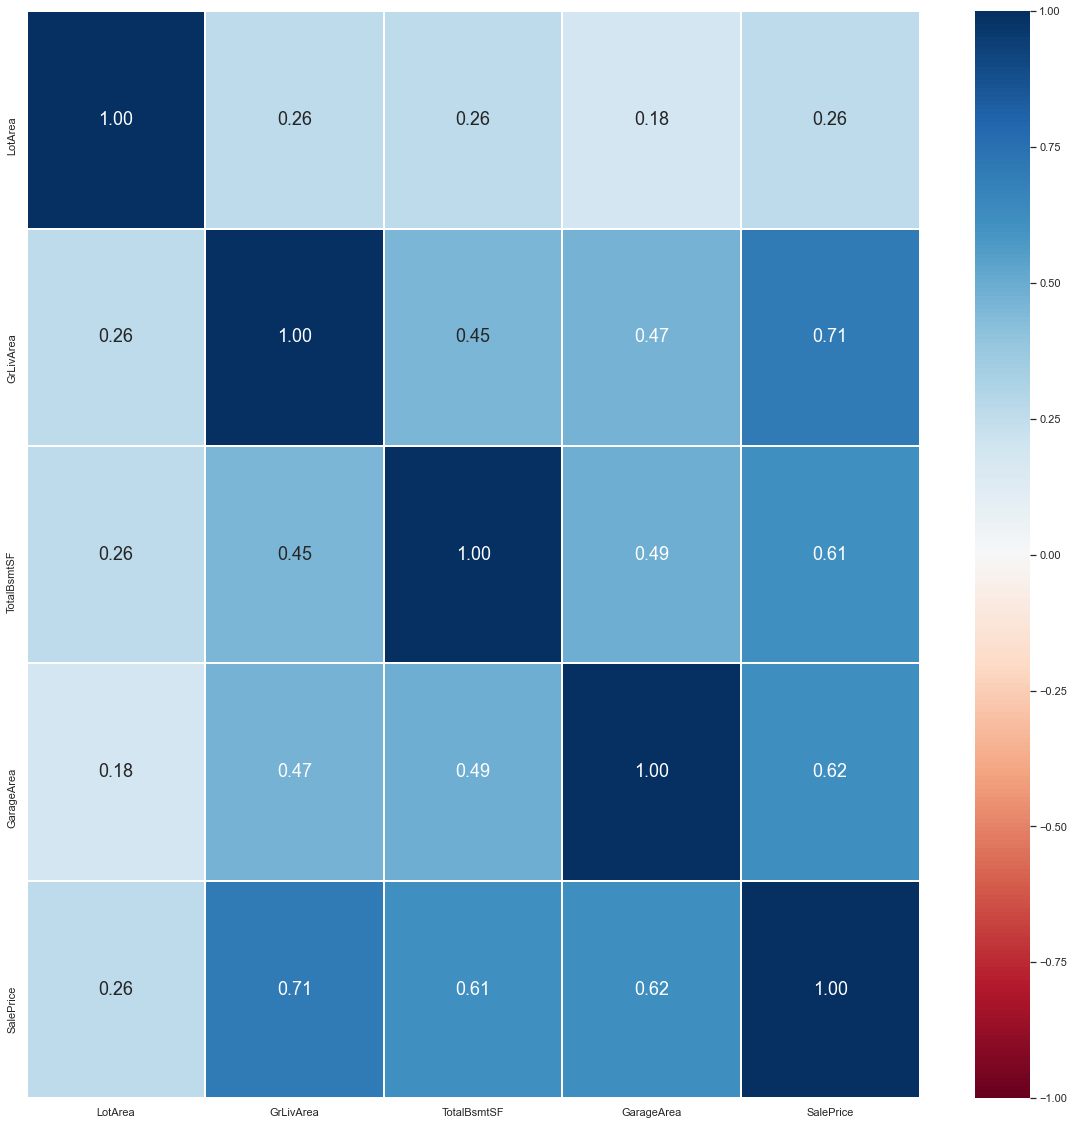

In [4]:
#c) Check the relationship amongst the variables using mutual correlation and the correlation heatmap. Comment
#which of the variables has the strongest correlation with “SalePrice”. Is this useful in predicting “SalePrice”?
# Correlation Matrix
print(houseNumData.corr())

# Heatmap of the Correlation Matrix
f = plt.figure(figsize=(20, 20))
sb.heatmap(houseNumData.corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 18}, cmap = "RdBu")

#GrLivArea best in predicting SalePrice and is fairly useful (Look at correlation and linearity)

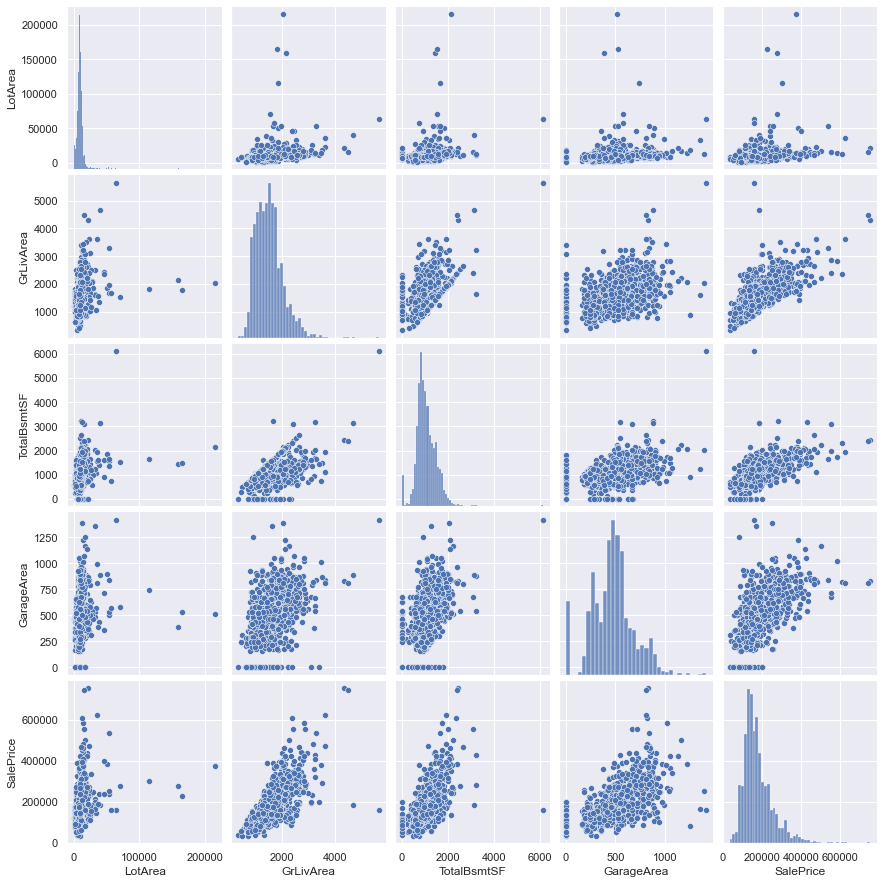

In [5]:
#d) Check the relationship amongst the variables using mutual jointplots and an overall pairplot. Comment which of
#the variables has the strongest linear relation with “SalePrice”. Is this useful in predicting “SalePrice”?

# Draw pairs of variables against one another
sb.pairplot(data = houseNumData)

#Look at correlation and linnearity

In [6]:
#a) Convert each of these variables into “category” data type (note that some are “int64”, and some are “object”).
houseCatData = pd.DataFrame(houseData[['MSSubClass', 'Neighborhood', 'BldgType', 'OverallQual']])
print(houseCatData.dtypes)
print(houseCatData.describe().round(2))
#houseCatData['MSSubClass'] = houseCatData['M']

MSSubClass       int64
Neighborhood    object
BldgType        object
OverallQual      int64
dtype: object
       MSSubClass  OverallQual
count      1460.0      1460.00
mean         56.9         6.10
std          42.3         1.38
min          20.0         1.00
25%          20.0         5.00
50%          50.0         6.00
75%          70.0         7.00
max         190.0        10.00


Number of MSSubClass: 15
20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64 

Number of Neighborhood: 25
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64 

Number of BldgType: 5
1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: BldgType, dtype: int64 

Number of OverallQual: 10
5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     18
2       3
1       2
Name: OverallQual, dtype: int64 



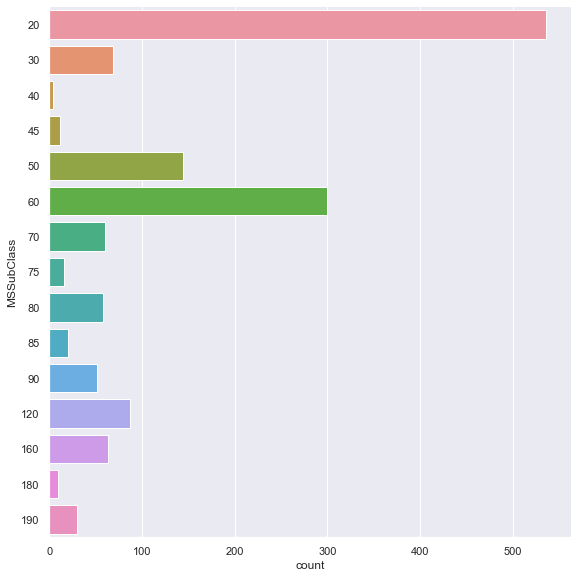

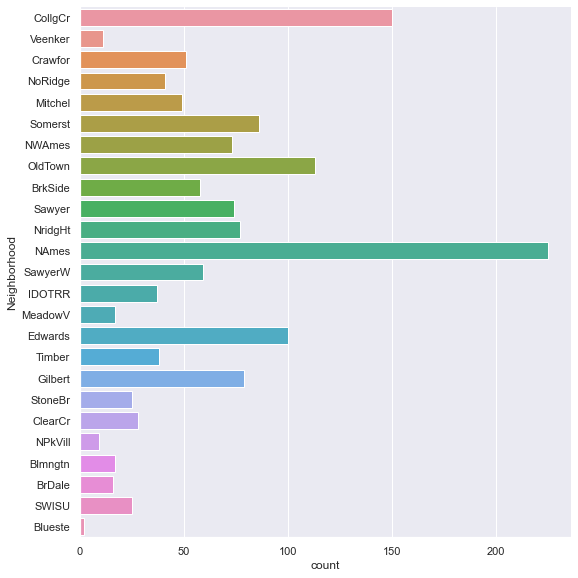

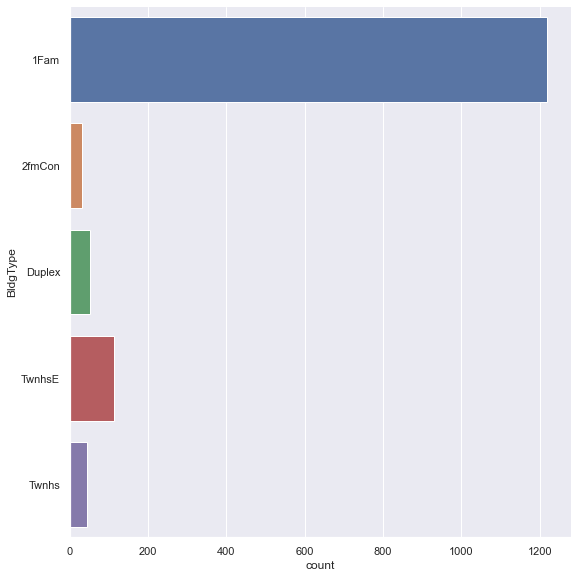

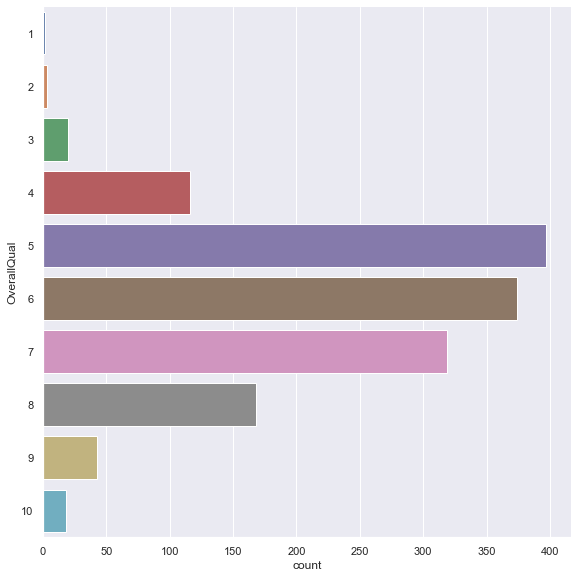

In [12]:
#b) Check the individual statistical description and visualize the distributions (catplot) of each of these variables.
# Generations in the Dataset
for key in houseCatData:
    print("Number of ", key, ": ", len(houseCatData[key].unique()), sep='')
    print(houseCatData[key].value_counts(), "\n")
    sb.catplot(y = key, data = houseCatData, kind = "count", height = 8)

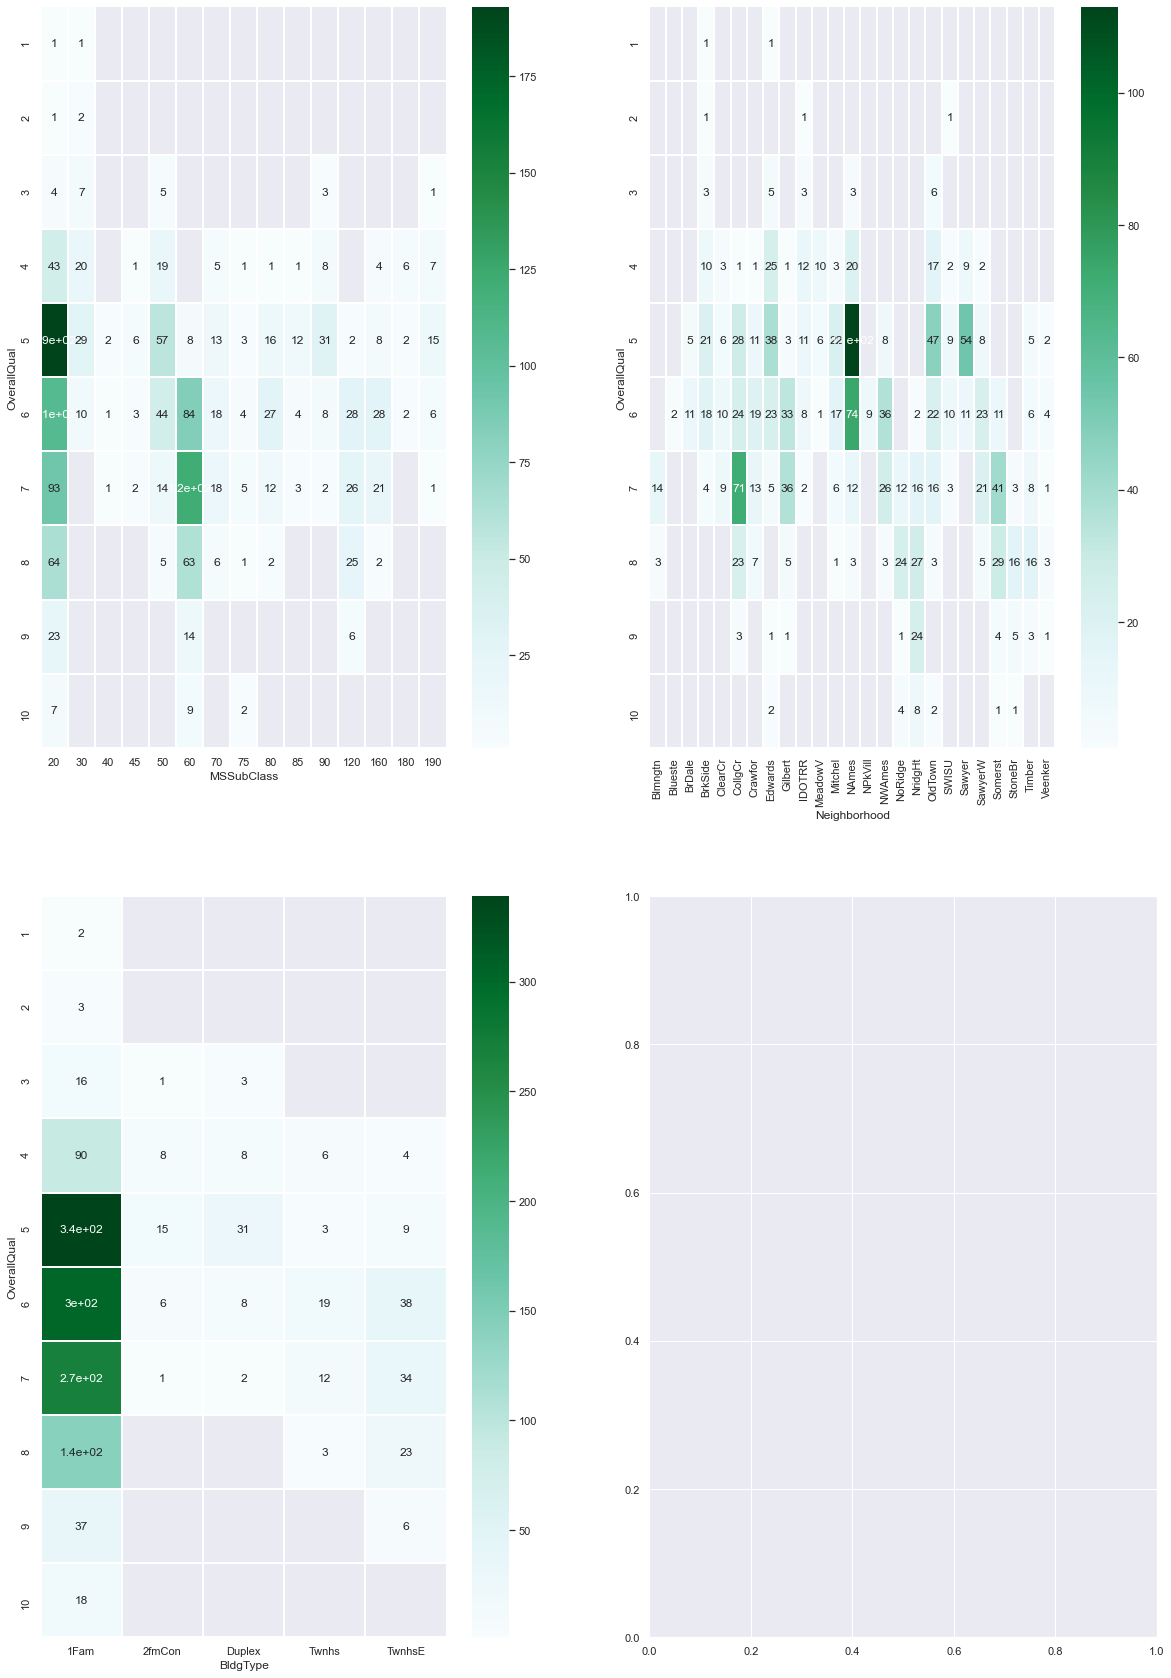

In [8]:
#c) One may check the relation amongst two categorical variables through the bi-variate joint heatmap of counts.
#Use groupby() command to generate joint heatmap of counts for “OverallQual” against the other three variables.
#Comment if this is useful in identifying the relation between “OverallQual” with the other variables.

f, axes = plt.subplots(2, 2, figsize=(20, 30))

count = 0
count1 = 0

for key in houseCatData:
    if (key != 'OverallQual'):
        if (count%2==1):
            count2 = 1
        else:
            count2 = 0
        sb.heatmap(houseCatData.groupby(['OverallQual', key]).size().unstack(), 
            linewidths = 1, annot = True, annot_kws = {"size": 12}, cmap = "BuGn", ax = axes[count1,count2])
        if (count2 == 1):
            count1 += 1
        count += 1

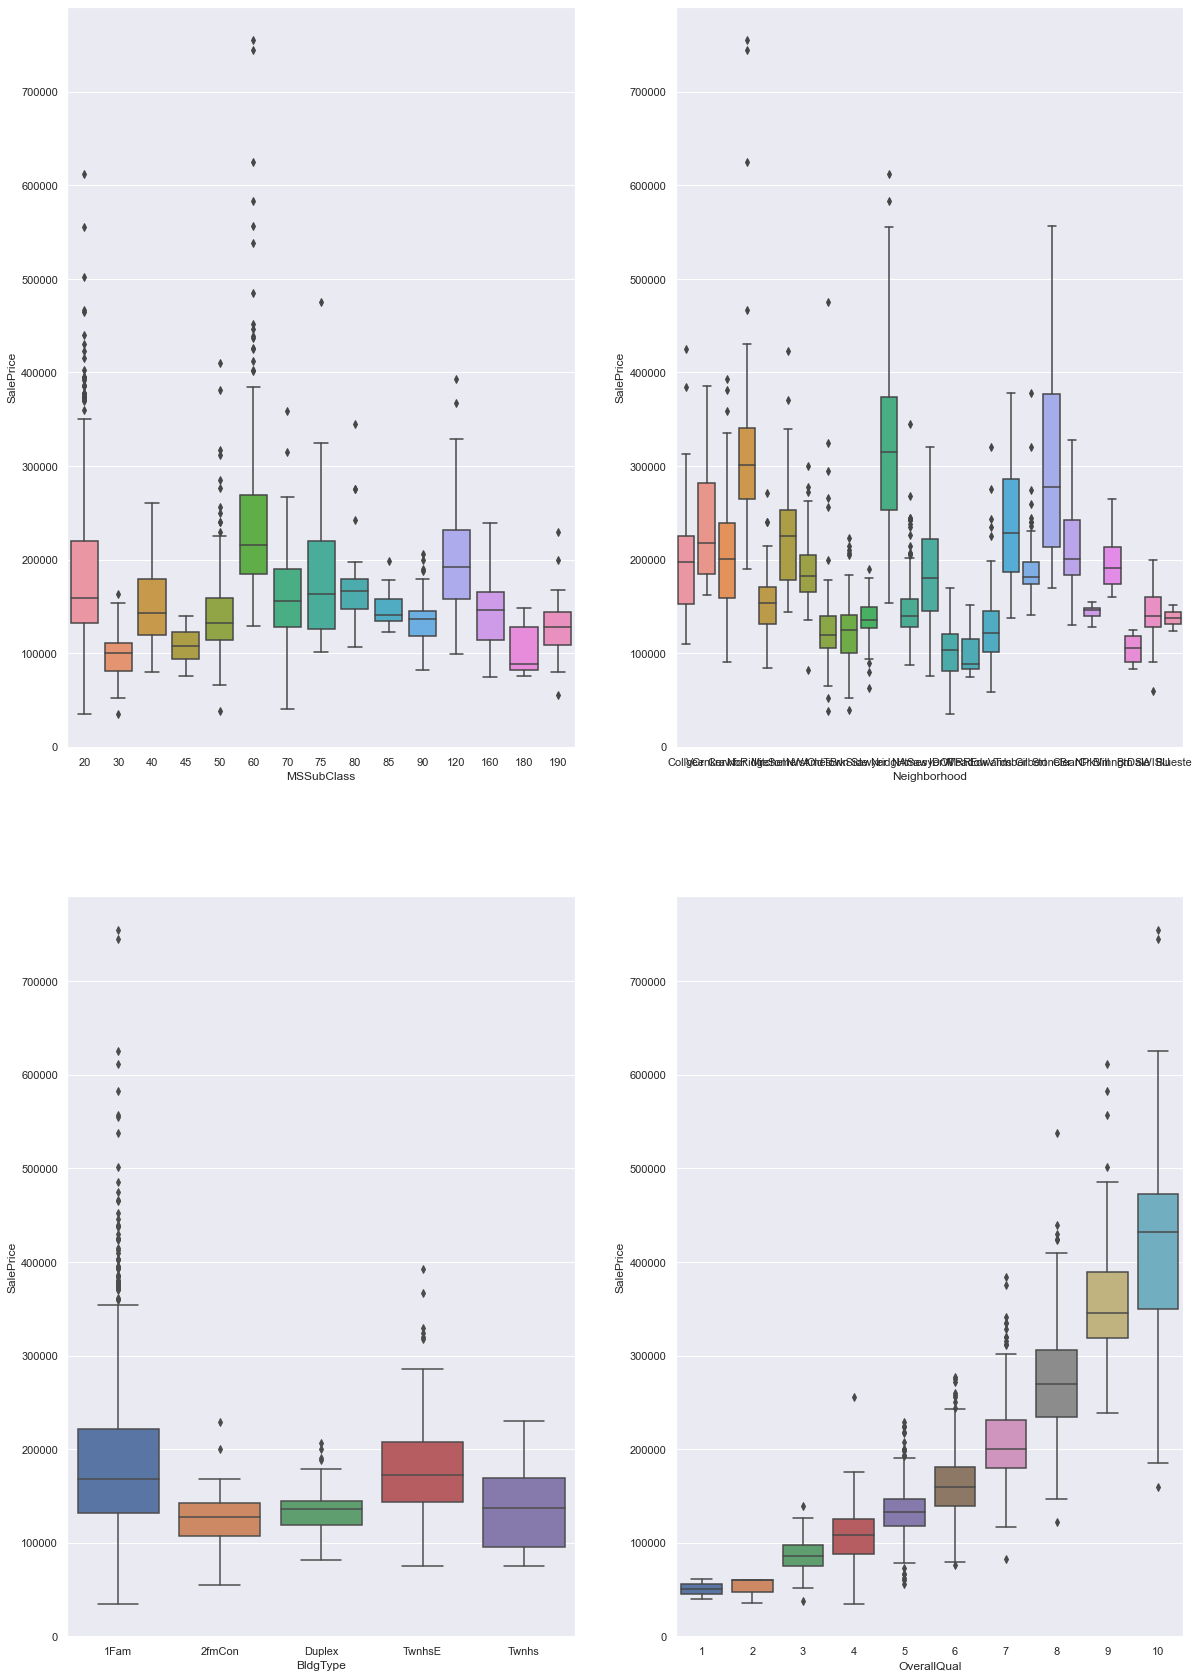

In [9]:
#d) Draw boxplots of “SalePrice” against each of these categorical variables. Notice the patterns in these boxplots.
#Comment on which of these variables has the most influence in predicting “SalePrice”.

f, axes = plt.subplots(2, 2, figsize=(20, 30))

houseMixData = pd.DataFrame(houseData[['MSSubClass', 'Neighborhood', 'BldgType', 'OverallQual', 'SalePrice']])

count = 0
count1 = 0

for key in houseMixData:
    if (key!='SalePrice'):
        if (count%2==1):
            count2 = 1
        else:
            count2 = 0
        sb.boxplot(x = houseMixData[key], y = houseMixData['SalePrice'], data = houseMixData, ax = axes[count1,count2])
        if (count2 == 1):
            count1 += 1
        count += 1
        
#Check variaition of box plot
#Lowest-BldgType
#Highest-OverallQual

#OverallQual has the most influence in predicting SalePrice